In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('firstset.xlsx')

In [3]:
df 

,Vehicle Number,Vehicle Type,Time (sec),Length (m),Width (m),Long Distance (m)b- X coordinate,Long Acc (m/sec2),Lat Distance (m) - Y coordinate,Lat Acc (m/sec2)
0,1.0,1.0,3.0,1.8,0.60,21.824918,-0.722183,2.351874,-0.105182
1,1.0,1.0,3.5,1.8,0.60,25.926373,0.308803,2.292952,0.014188
2,1.0,1.0,4.0,1.8,0.60,30.411296,1.023511,2.206669,0.238653
3,1.0,1.0,4.5,1.8,0.60,35.699721,2.213050,2.407390,-0.147137
4,1.0,1.0,5.0,1.8,0.60,43.430696,-1.793718,2.438842,-0.240332
...,...,...,...,...,...,...,...,...,...
57499,1510.0,2.0,901.5,4.2,1.64,212.665315,-0.106557,7.154021,0.071705
57500,1511.0,1.0,901.5,1.8,0.60,210.294082,-0.398412,4.344963,-0.114513
57501,1512.0,5.0,901.5,5.0,1.90,176.905187,0.479511,9.208052,0.066317
57502,1513.0,2.0,901.5,4.2,1.87,193.099277,-0.406644,6.206763,0.042438


In [4]:
# reset the index
df = df.reset_index()

In [5]:
# Group by Vehicle Number
vehicle_grouped = df.groupby('Vehicle Number', as_index=False)

# Sort by time for each group
vehicle_sorted = vehicle_grouped.apply(lambda x: x.sort_values('Time (sec)'))

# Calculate instantaneous speed for each group
vehicle_sorted['Distance (m)'] = np.sqrt(
    (vehicle_sorted['Long Distance (m)b- X coordinate'].diff() ** 2) + 
    (vehicle_sorted['Lat Distance (m) - Y coordinate'].diff() ** 2)
)
vehicle_sorted['Instantaneous Speed (m/s)'] = vehicle_sorted['Distance (m)'] / vehicle_sorted['Time (sec)'].diff()

# Calculate average speed for each group
first_pos = vehicle_sorted.groupby('Vehicle Number').first()[['Long Distance (m)b- X coordinate', 'Lat Distance (m) - Y coordinate']]
last_pos = vehicle_sorted.groupby('Vehicle Number').last()[['Long Distance (m)b- X coordinate', 'Lat Distance (m) - Y coordinate']]
total_time = vehicle_sorted.groupby('Vehicle Number')['Time (sec)'].apply(lambda x: x.iloc[-1] - x.iloc[0])
distance = np.sqrt(((last_pos - first_pos) ** 2).sum(axis=1))
average_speed = distance / total_time

# Merge the average speed back into the original dataframe
vehicle_sorted = pd.merge(vehicle_sorted, average_speed.rename('Average Speed (m/s)'), on='Vehicle Number')


In [6]:
# create a dictionary of vehicle type codes and their corresponding labels/pictorial representations
vehicle_types = {
    1: 'Motorcycle',
    2: 'Car',
    3: 'Bus',
    4: 'Truck',
    5: 'Light Commercial Vehicle',
    6: 'Auto'
}

# create a legend using the dictionary
for code, label in vehicle_types.items():
    print(f'{code} - {label}')

1 - Motorcycle
2 - Car
3 - Bus
4 - Truck
5 - Light Commercial Vehicle
6 - Auto


In [7]:
vehicle_sorted = vehicle_sorted.rename(columns={'Average Speed (m/s)_y': 'average_speed'})
# Drop any row with missing values
vehicle_sorted.dropna(inplace=True)

# Drop any row where Instantaneous Speed (m/s) or Average Speed (m/s) is less than 0
vehicle_sorted = vehicle_sorted[(vehicle_sorted['Instantaneous Speed (m/s)'] >= 0) & (vehicle_sorted['Average Speed (m/s)'] >= 0)]

# Reset the index of the cleaned dataframe
vehicle_sorted.reset_index(drop=True, inplace=True)
vehicle_sorted.head(50)

,index,Vehicle Number,Vehicle Type,Time (sec),Length (m),Width (m),Long Distance (m)b- X coordinate,Long Acc (m/sec2),Lat Distance (m) - Y coordinate,Lat Acc (m/sec2),Distance (m),Instantaneous Speed (m/s),Average Speed (m/s)
0,1,1.0,1.0,3.5,1.8,0.6,25.926373,0.308803,2.292952,0.014188,4.101878,8.203756,10.908206
1,2,1.0,1.0,4.0,1.8,0.6,30.411296,1.023511,2.206669,0.238653,4.485754,8.971507,10.908206
2,3,1.0,1.0,4.5,1.8,0.6,35.699721,2.213050,2.407390,-0.147137,5.292232,10.584464,10.908206
3,4,1.0,1.0,5.0,1.8,0.6,43.430696,-1.793718,2.438842,-0.240332,7.731039,15.462078,10.908206
4,5,1.0,1.0,5.5,1.8,0.6,49.227116,-2.624294,2.226489,0.080316,5.800309,11.600618,10.908206
5,6,1.0,1.0,6.0,1.8,0.6,52.486636,0.571015,2.104038,0.237319,3.261819,6.523639,10.908206
6,7,1.0,1.0,6.5,1.8,0.6,56.289709,1.962854,2.220003,-0.041302,3.804841,7.609681,10.908206
7,8,1.0,1.0,7.0,1.8,0.6,62.241365,-0.360808,2.294258,-0.152390,5.952119,11.904237,10.908206
8,9,1.0,1.0,7.5,1.8,0.6,67.647892,-0.740412,2.201611,0.033881,5.407322,10.814643,10.908206
9,10,1.0,1.0,8.0,1.8,0.6,72.239085,0.399570,2.154015,0.092630,4.591440,9.182879,10.908206


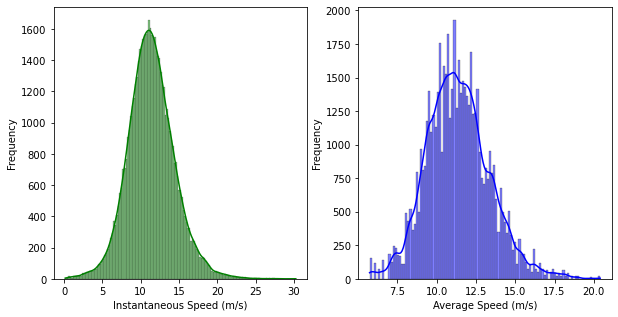

In [8]:
# create a figure with two subplots for instantaneous and average speed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot a histogram of instantaneous speed on the first subplot
sns.histplot(vehicle_sorted['Instantaneous Speed (m/s)'], ax=ax1, kde=True, color='green')
ax1.set_xlabel('Instantaneous Speed (m/s)')
ax1.set_ylabel('Frequency')

# plot a histogram of average speed on the second subplot
sns.histplot(vehicle_sorted['Average Speed (m/s)'], ax=ax2, kde=True, color='blue')
ax2.set_xlabel('Average Speed (m/s)')
ax2.set_ylabel('Frequency')

# show the plot
plt.show()

In [9]:
grouped = vehicle_sorted.groupby('Vehicle Type')['Instantaneous Speed (m/s)'].agg(['min', 'max', 'mean', 'median', 'std'])
grouped = grouped.rename(columns={'min': 'min_speed', 'max': 'max_speed', 'mean': 'mean_speed', 'median': 'median_speed', 'std': 'std_deviation'})
grouped['average_speed'] = vehicle_sorted.groupby('Vehicle Type')['Average Speed (m/s)'].mean()

In [10]:
grouped

,min_speed,max_speed,mean_speed,median_speed,std_deviation,average_speed
Vehicle Type,,,,,,
1.0,0.190906,30.251106,11.641562,11.505696,3.126470,11.635401
2.0,0.140698,27.548263,11.805947,11.663801,2.862886,11.800544
3.0,1.247410,20.059338,11.159998,11.177008,2.169261,11.157138
4.0,2.816054,19.343807,10.149275,10.273496,2.848225,10.146466
5.0,4.467250,20.201772,11.490045,11.441234,2.409833,11.487740
6.0,0.186357,24.900255,9.752758,9.685468,2.684175,9.748779


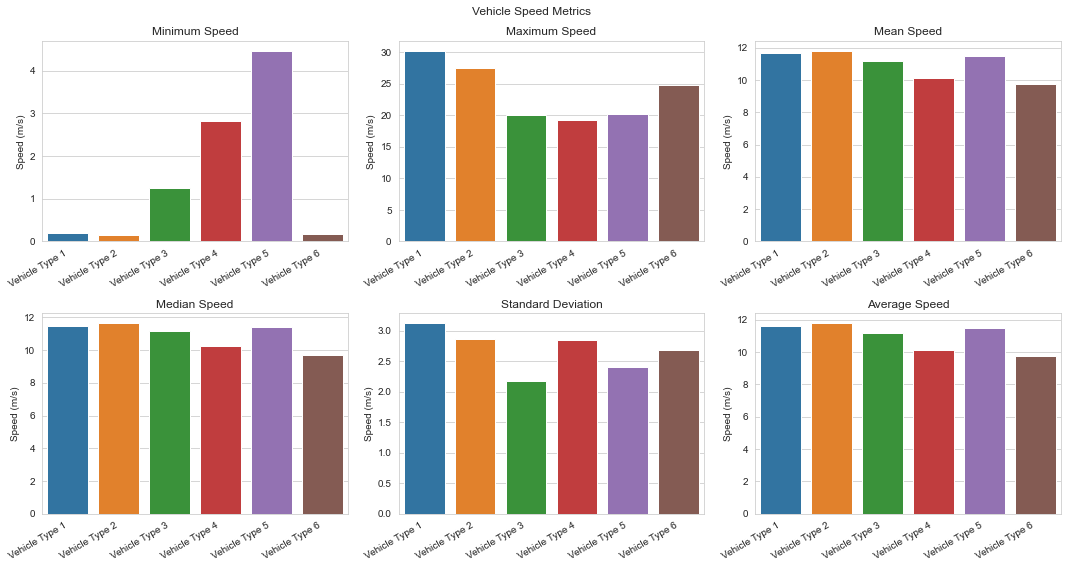

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# Define the x-axis labels
labels = ['Vehicle Type 1', 'Vehicle Type 2', 'Vehicle Type 3', 'Vehicle Type 4', 'Vehicle Type 5', 'Vehicle Type 6']

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Vehicle Speed Metrics')

# Plot the minimum speed
sns.barplot(x=labels, y='min_speed', data=grouped, ax=axs[0, 0])
axs[0, 0].set_title('Minimum Speed')
axs[0, 0].set_xticklabels(labels, rotation=30, ha='right')

# Plot the maximum speed
sns.barplot(x=labels, y='max_speed', data=grouped, ax=axs[0, 1])
axs[0, 1].set_title('Maximum Speed')
axs[0, 1].set_xticklabels(labels, rotation=30, ha='right')

# Plot the mean speed
sns.barplot(x=labels, y='mean_speed', data=grouped, ax=axs[0, 2])
axs[0, 2].set_title('Mean Speed')
axs[0, 2].set_xticklabels(labels, rotation=30, ha='right')

# Plot the median speed
sns.barplot(x=labels, y='median_speed', data=grouped, ax=axs[1, 0])
axs[1, 0].set_title('Median Speed')
axs[1, 0].set_xticklabels(labels, rotation=30, ha='right')

# Plot the standard deviation of the speed
sns.barplot(x=labels, y='std_deviation', data=grouped, ax=axs[1, 1])
axs[1, 1].set_title('Standard Deviation')
axs[1, 1].set_xticklabels(labels, rotation=30, ha='right')

# Plot the average speed
sns.barplot(x=labels, y='average_speed', data=grouped, ax=axs[1, 2])
axs[1, 2].set_title('Average Speed')
axs[1, 2].set_xticklabels(labels, rotation=30, ha='right')

# Set the y-axis labels and adjust the layout
for ax in axs.flat:
    ax.set_ylabel('Speed (m/s)')
plt.tight_layout()

# Display the plots
plt.show()


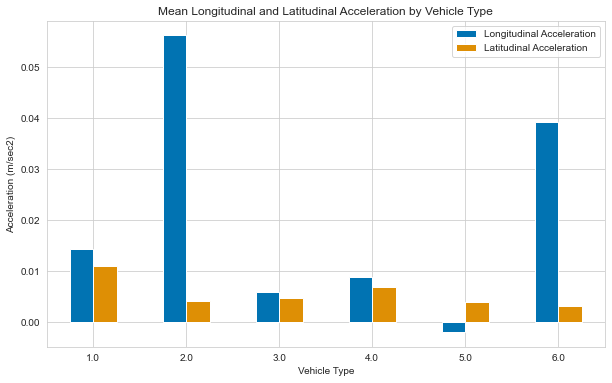

In [12]:
# remove rows where vehicle type is not in range 1 to 6
df = df[(df['Vehicle Type'] >= 1) & (df['Vehicle Type'] <= 6)]

# group the vehicles by their vehicle types
groupedAcc = df.groupby('Vehicle Type')

# calculate the mean acceleration and retardation in both the latitudinal and longitudinal directions
acceleration = groupedAcc[['Long Acc (m/sec2)', 'Lat Acc (m/sec2)']].mean()

# create a new dataframe with the mean acceleration and retardation values
data = pd.DataFrame({
    'Longitudinal Acceleration': acceleration['Long Acc (m/sec2)'],
    'Latitudinal Acceleration': acceleration['Lat Acc (m/sec2)'],
})

# plot the median acceleration and retardation in longitudinal and latitudinal directions for all the six different vehicle types
sns.set_style('whitegrid')
sns.set_palette('colorblind')
ax = data.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Acceleration (m/sec2)')
ax.set_title('Mean Longitudinal and Latitudinal Acceleration by Vehicle Type')
plt.show()

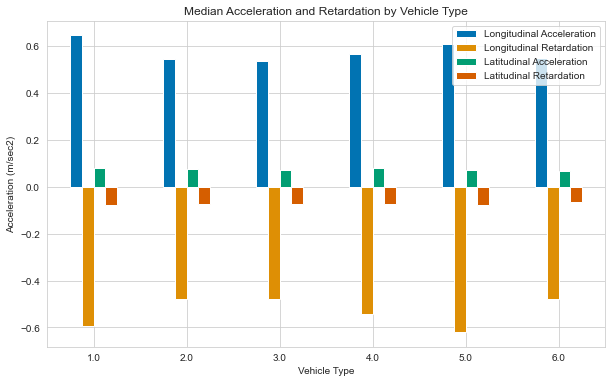

In [13]:
# group the vehicles by their vehicle types
groupedAcc = df.groupby('Vehicle Type')

# calculate the mean acceleration and retardation in both the latitudinal and longitudinal directions
acceleration = groupedAcc[['Long Acc (m/sec2)', 'Lat Acc (m/sec2)']].mean()

# calculate median latitudinal and longitudinal acceleration and retardation for each vehicle type
medians = pd.DataFrame({
    'Longitudinal Acceleration': groupedAcc['Long Acc (m/sec2)'].apply(lambda x: np.median(x[x > 0])),
    'Longitudinal Retardation': groupedAcc['Long Acc (m/sec2)'].apply(lambda x: np.median(x[x < 0])),
    'Latitudinal Acceleration': groupedAcc['Lat Acc (m/sec2)'].apply(lambda x: np.median(x[x > 0])),
    'Latitudinal Retardation': groupedAcc['Lat Acc (m/sec2)'].apply(lambda x: np.median(x[x < 0]))
})

# plot the median acceleration and retardation in longitudinal and latitudinal directions for all the six different vehicle types
sns.set_style('whitegrid')
sns.set_palette('colorblind')
ax = medians.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Acceleration (m/sec2)')
ax.set_title('Median Acceleration and Retardation by Vehicle Type')
plt.show()

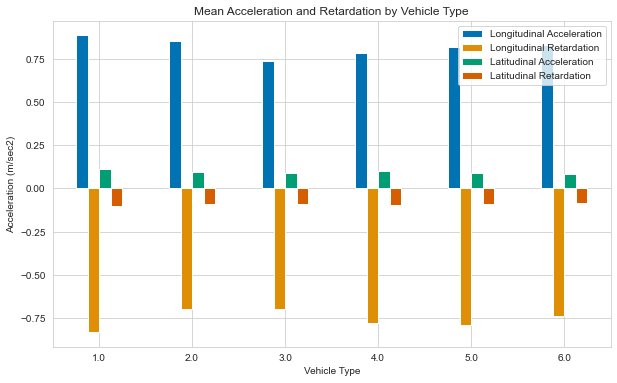

In [14]:
# group the vehicles by their vehicle types
groupedAcc = df.groupby('Vehicle Type')

# calculate the mean acceleration and retardation in both the latitudinal and longitudinal directions
acceleration = groupedAcc[['Long Acc (m/sec2)', 'Lat Acc (m/sec2)']].mean()

# calculate median latitudinal and longitudinal acceleration and retardation for each vehicle type
medians = pd.DataFrame({
    'Longitudinal Acceleration': groupedAcc['Long Acc (m/sec2)'].apply(lambda x: np.mean(x[x > 0])),
    'Longitudinal Retardation': groupedAcc['Long Acc (m/sec2)'].apply(lambda x: np.mean(x[x < 0])),
    'Latitudinal Acceleration': groupedAcc['Lat Acc (m/sec2)'].apply(lambda x: np.mean(x[x > 0])),
    'Latitudinal Retardation': groupedAcc['Lat Acc (m/sec2)'].apply(lambda x: np.mean(x[x < 0]))
})

# plot the median acceleration and retardation in longitudinal and latitudinal directions for all the six different vehicle types
sns.set_style('whitegrid')
sns.set_palette('colorblind')
ax = medians.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Acceleration (m/sec2)')
ax.set_title('Mean Acceleration and Retardation by Vehicle Type')
plt.show()

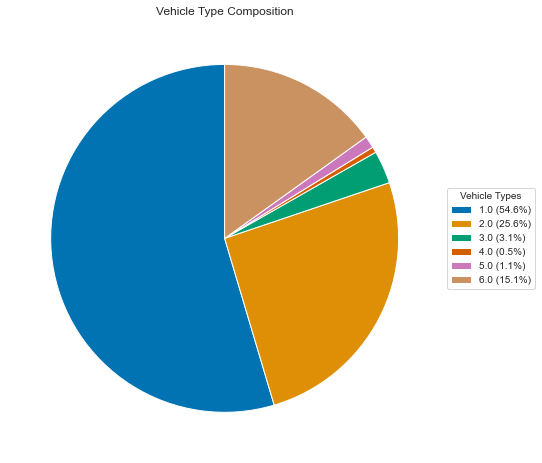

In [15]:
# group the vehicles by their vehicle types
grouped = df.groupby('Vehicle Type')

# calculate the count of vehicles in each group
vehicle_counts = grouped.size()

# calculate the percentage of each vehicle type
vehicle_percentages = vehicle_counts / sum(vehicle_counts) * 100

# create a pie chart of the vehicle type composition
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _, autotexts = ax.pie(vehicle_counts, autopct='', startangle=90)

# add the percentage values to the legend outside the chart
labels = [f'{l} ({p:.1f}%)' for l, p in zip(vehicle_counts.index, vehicle_percentages)]
ax.legend(wedges, labels,
          title='Vehicle Types',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

# remove the writing from the pie chart
for autotext in autotexts:
    autotext.set_visible(False)

# set the chart title
ax.set_title('Vehicle Type Composition')

# show the chart
plt.show()

In [16]:
# Define the PCU values for each vehicle class
pcu_values = {
    1: 0.75,
    2: 1,
    3: 2,
    4: 2,
    5: 1.4,
    6: 2
}

# Calculate the total number of vehicles for each class
vehicle_count = df.groupby('Vehicle Type')['Vehicle Number'].count().reset_index()
vehicle_count.columns = ['Vehicle Type', 'vehicle_count']

# Calculate the vehicle flow/volume for each class
time_period = 1  # Assuming time period is 1 hour
vehicle_flow = vehicle_count['vehicle_count'] / time_period
vehicle_flow = vehicle_flow.reset_index(drop=True)

# Calculate the PCU flow for each class
pcu_flow = vehicle_flow * vehicle_count['Vehicle Type'].map(pcu_values)
pcu_flow = pcu_flow.reset_index(drop=True)

# Combine the results into a final dataframe
result = pd.DataFrame({'Vehicle Type': vehicle_count['Vehicle Type'], 'vehicle_count': vehicle_count['vehicle_count'], 'vehicle_flow': vehicle_flow, 'pcu_flow': pcu_flow})

# Display the final dataframe
print(result)


   Vehicle Type  vehicle_count  vehicle_flow  pcu_flow
0           1.0          31394       31394.0   23545.5
1           2.0          14715       14715.0   14715.0
2           3.0           1756        1756.0    3512.0
3           4.0            308         308.0     616.0
4           5.0            641         641.0     897.4
5           6.0           8685        8685.0   17370.0


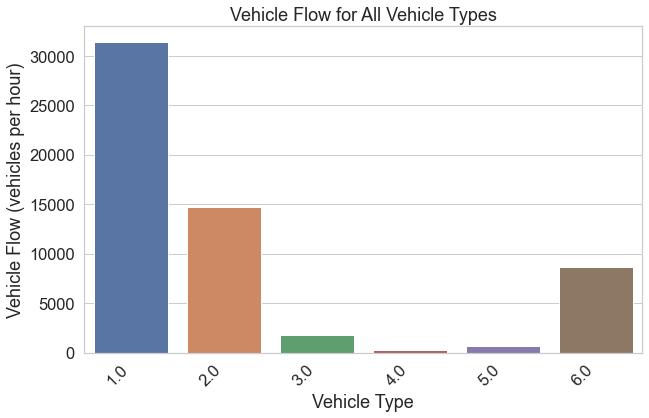

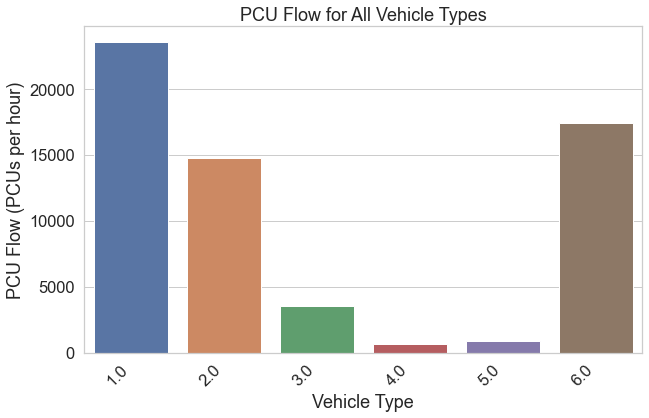

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font size and style for better readability
sns.set(font_scale=1.5, style='whitegrid')

# Plot the vehicle flow for all vehicle types
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Type', y='vehicle_flow', data=result)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Type')
plt.ylabel('Vehicle Flow (vehicles per hour)')
plt.title('Vehicle Flow for All Vehicle Types')
plt.show()

# Plot the PCU flow for all vehicle types
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Type', y='pcu_flow', data=result)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Vehicle Type')
plt.ylabel('PCU Flow (PCUs per hour)')
plt.title('PCU Flow for All Vehicle Types')
plt.show()